<a href="https://colab.research.google.com/github/Celesu/My-Journey/blob/main/MiniMachineLearning/RockPaperScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-24 13:03:45--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.79MB/s    in 55s     

2020-07-24 13:04:41 (5.56 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp')

['__MACOSX', 'rockpaperscissors.zip', 'rockpaperscissors']

In [ ]:
os.chdir('/tmp/rockpaperscissors')

In [ ]:
os.mkdir('train')

In [ ]:
base_dir = '/tmp/rockpaperscissors'
os.listdir(base_dir)

['scissors',
 'paper',
 'rock',
 'README_rpc-cv-images.txt',
 'train',
 'rps-cv-images']

In [ ]:
train_dir = base_dir + '/train'
os.chdir(train_dir)

In [ ]:
#Directory baru dalam train directory
for i in ('rock', 'paper', 'scissors'):
    os.mkdir(i)

os.listdir(train_dir)

['scissors', 'paper', 'rock']

In [ ]:
os.chdir(base_dir)
os.mkdir('val')
val_dir = base_dir + '/val'
os.chdir(val_dir)

In [ ]:
#Membuat directory utk test dataset
for i in ('rock', 'paper', 'scissors'):
    os.mkdir(i)

os.listdir(val_dir)

['scissors', 'paper', 'rock']

In [ ]:
val_dir = base_dir + '/val'


In [ ]:
import shutil  

In [ ]:
a_ = []
b_ = [] #Untuk train dataset
for i in ('/rock', '/paper', '/scissors'):
    k = len(os.listdir(base_dir + i))
    a_.append(k)
    b_.append(k - int(k*0.2))

In [ ]:
#Split datanya
k = 0
for i in b_:
    k += 1 
    if k == 1:
      dir = '/rock/'
    elif k == 2:
      dir = '/paper/'
    else:
      dir = '/scissors/'

    for ii in os.listdir(base_dir + dir)[:i]:
        shutil.move(base_dir + dir + ii,  train_dir + dir)

    for iii in os.listdir(base_dir + dir):
        shutil.move(base_dir + dir + iii, val_dir + dir)

In [ ]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

val_rock_dir = os.path.join(val_dir, 'rock')
val_paper_dir = os.path.join(val_dir, 'paper')
val_scissors_dir = os.path.join(val_dir, 'scissors')

In [ ]:
#---------------- Start Modelling ----------------#

In [ ]:
data_generator = ImageDataGenerator(
    rescale=1./255, 
    rotation_range = 30, 
    vertical_flip = True, 
    horizontal_flip = True, 
    shear_range = 0.2, 
    fill_mode = 'nearest'
    )

#Karena data generator untuk train dan validate sama

In [ ]:
train_generator = data_generator.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    class_mode='categorical'  #Karena ada 3 tipe yaitu rock, paper, scissors
    )

validation_generator = data_generator.flow_from_directory(
    val_dir, 
    target_size=(150, 150), 
    class_mode='categorical'
    )

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation = 'softmax'),
])

In [ ]:
model.compile(loss='mean_squared_error',  #agar loss yang dihasilkan lebih sedikit (loss < 0.05)
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch = 32,
            epochs = 15,
            validation_data = validation_generator,
            validation_steps = 4,  
            verbose = 2
            )

Epoch 1/15
32/32 - 29s - loss: 0.2054 - accuracy: 0.4453 - val_loss: 0.1545 - val_accuracy: 0.6562
Epoch 2/15
32/32 - 29s - loss: 0.1003 - accuracy: 0.8066 - val_loss: 0.0581 - val_accuracy: 0.8828
Epoch 3/15
32/32 - 29s - loss: 0.0712 - accuracy: 0.8662 - val_loss: 0.0613 - val_accuracy: 0.8906
Epoch 4/15
32/32 - 29s - loss: 0.0626 - accuracy: 0.8672 - val_loss: 0.0512 - val_accuracy: 0.9062
Epoch 5/15
32/32 - 29s - loss: 0.0523 - accuracy: 0.8975 - val_loss: 0.0685 - val_accuracy: 0.8672
Epoch 6/15
32/32 - 29s - loss: 0.0398 - accuracy: 0.9202 - val_loss: 0.0279 - val_accuracy: 0.9297
Epoch 7/15
32/32 - 29s - loss: 0.0304 - accuracy: 0.9438 - val_loss: 0.0403 - val_accuracy: 0.9219
Epoch 8/15
32/32 - 29s - loss: 0.0484 - accuracy: 0.9082 - val_loss: 0.0444 - val_accuracy: 0.9219
Epoch 9/15
32/32 - 29s - loss: 0.0304 - accuracy: 0.9443 - val_loss: 0.0217 - val_accuracy: 0.9609
Epoch 10/15
32/32 - 29s - loss: 0.0272 - accuracy: 0.9482 - val_loss: 0.0111 - val_accuracy: 0.9844
Epoch 11/

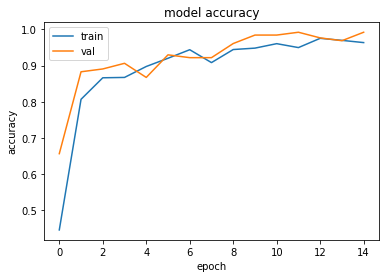

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
 
  #prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)         

  #Kenapa bukan rock, paper, scissors? karena google colab sudah auto menyortir
  #path yang ada, sehingga urutannya menjadi paper, rock, dan scissors.
  
  if classes[0][0] == 1:
    print('paper')        
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')